<a href="https://colab.research.google.com/github/mrella/finance_colab/blob/main/HRP_riskportfoliolib_equal_risk_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install Riskfolio-Lib

In [87]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

#yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

start = '2021-01-01'
end = '2025-05-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets = ["IWM", "VWO","SPY", "MOAT"]
assets = ["XLE", "XLK","SPY", "MOAT","IWM", "VWO"]
assets = ["SPY", "REIT","IWM", "TLT", "VWO"]
assets = ["XLK","SPY", "BABA", "JD","IWM", "VWO", "NGD", "KWEB", "MOAT", "GOOGL", "META"]
assets = ["XLK","SPY", "IWM", "VWO", "NGD", "KWEB"]

assets.sort()
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()

#display(Y.head())

[*********************100%***********************]  6 of 6 completed


In [88]:
#import riskfolio.PlotFunctions as plf
import riskfolio as rp
# Plotting Assets Clusters
#ax = rp.plot_clusters(returns=Y,                       #correlation='pearson',                       linkage='ward',                       k=None,                       max_k=10,                       leaf_order=True,                       dendrogram=True,                       #linecolor='tab:purple',                       ax=None)

In [89]:
#import riskfolio.HCPortfolio as hc

# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:


model='HERC' # Could be HRP or HERC
correlation = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV'
#rm = 'UCI_Rel' # Risk measure used, this time will be variance

rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      #correlation=correlation,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order,
                      obj='Sharpe'   #obj='MinRisk'
                      )

display(w.T)


,IWM,KWEB,NGD,SPY,VWO,XLK
weights,16.7411%,3.5561%,7.9267%,29.0102%,28.6411%,14.1248%


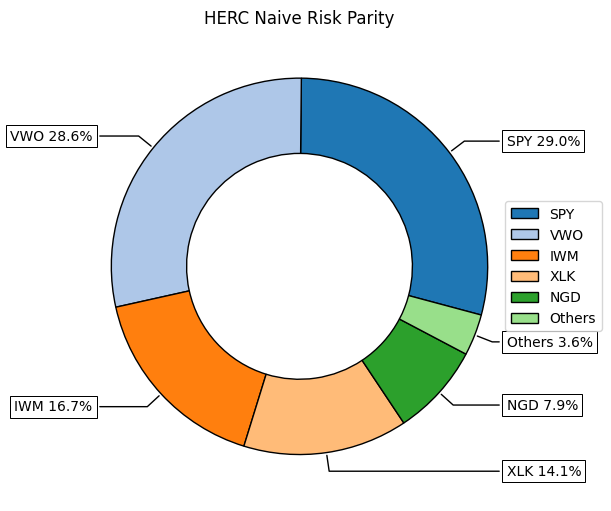

In [90]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                  title='HERC Naive Risk Parity',
                  others=0.05,
                  nrow=25,
                  cmap="tab20",
                  height=5,
                  width=6,
                  ax=None)

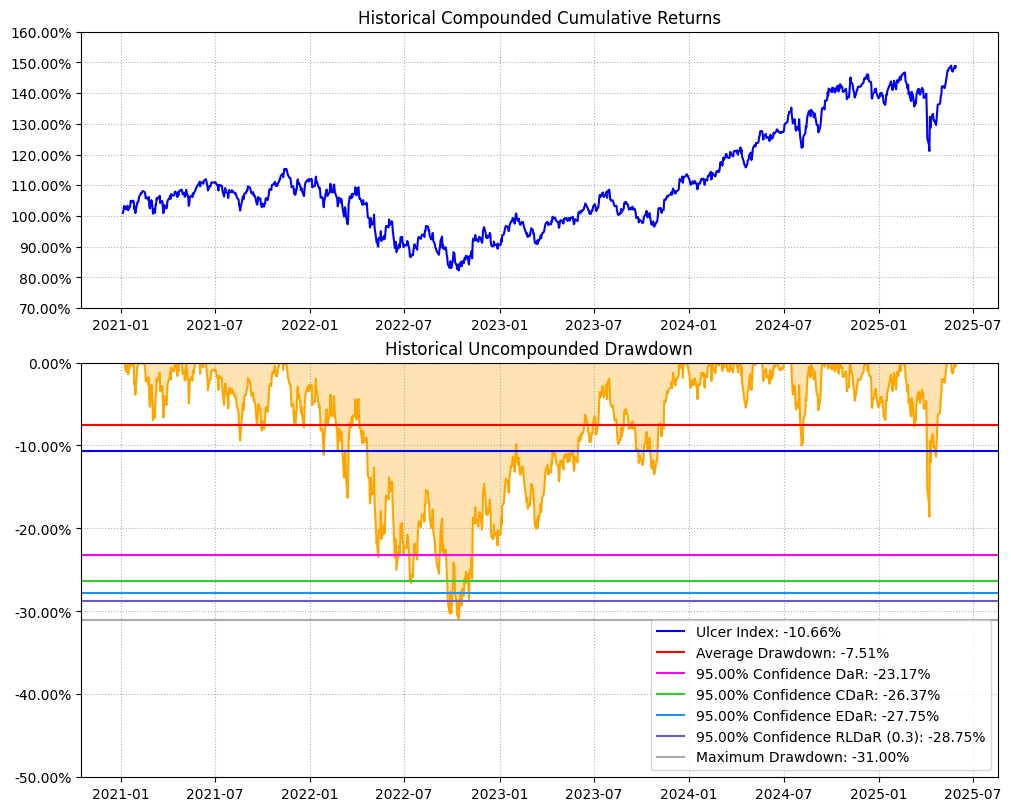

In [91]:
ax = rp.plot_drawdown(returns=Y,
                      w=w,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

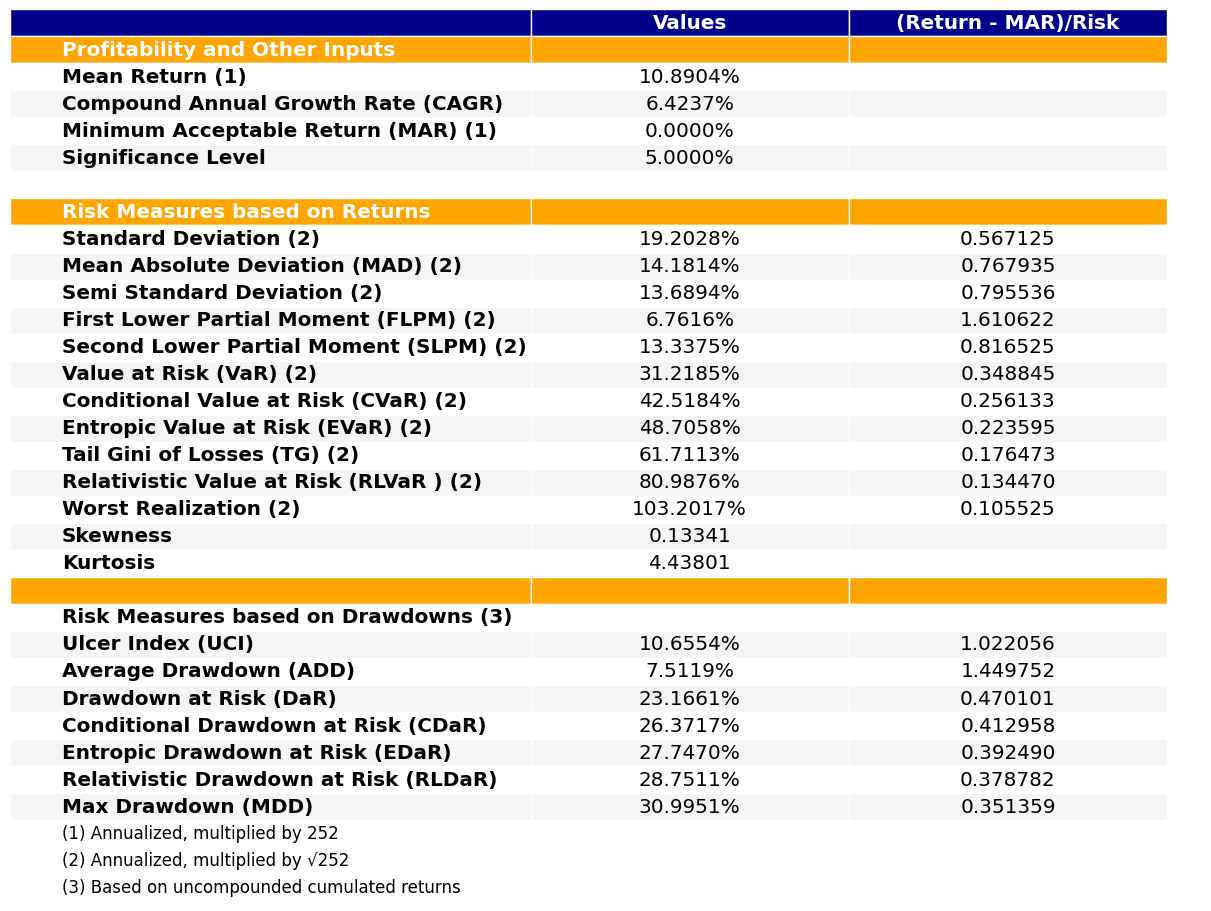

In [92]:
x = rp.plot_table(returns=Y,
                   w=w,
                   MAR=0,
                   alpha=0.05,
                   ax=None)

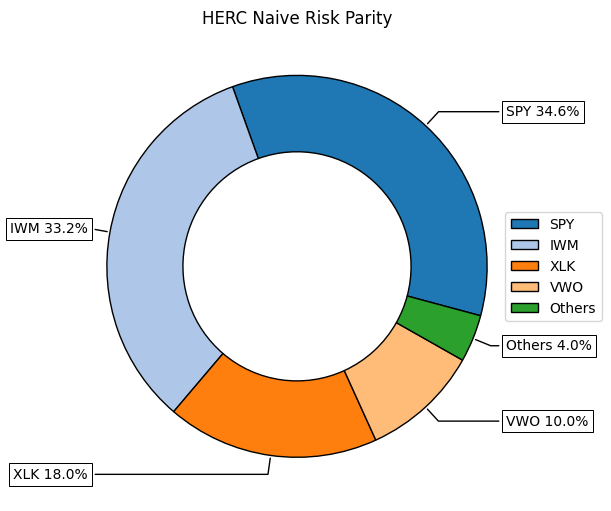

In [93]:
# Tus pesos personalizados deben sumar 1
weights = pd.Series([0.3319, 0.02, 0.02, 0.346, 0.1, 0.18], index=assets)

# Estimar retornos y covarianza
portafolio = rp.Portfolio(returns=Y)
portafolio.weights = weights

ax = rp.plot_pie(w=portafolio.weights,
                  title='HERC Naive Risk Parity',
                  others=0.05,
                  nrow=25,
                  cmap="tab20",
                  height=5,
                  width=6,
                  ax=None)

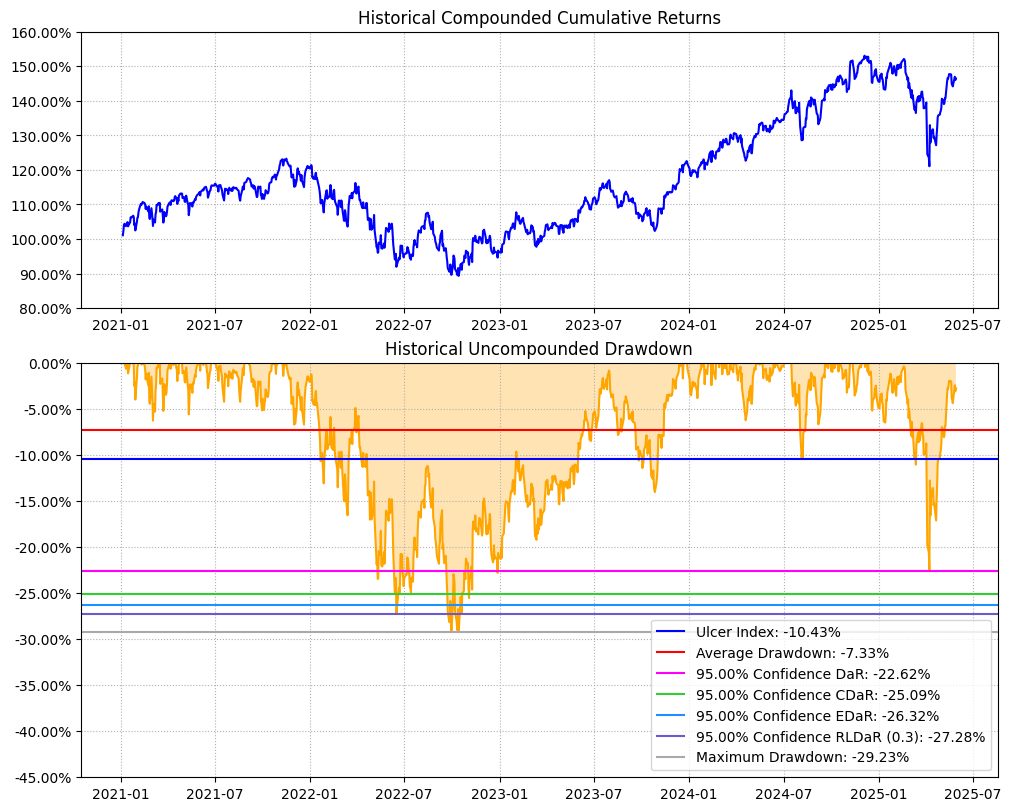

In [94]:
ax = rp.plot_drawdown(returns=Y,
                      w=portafolio.weights,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

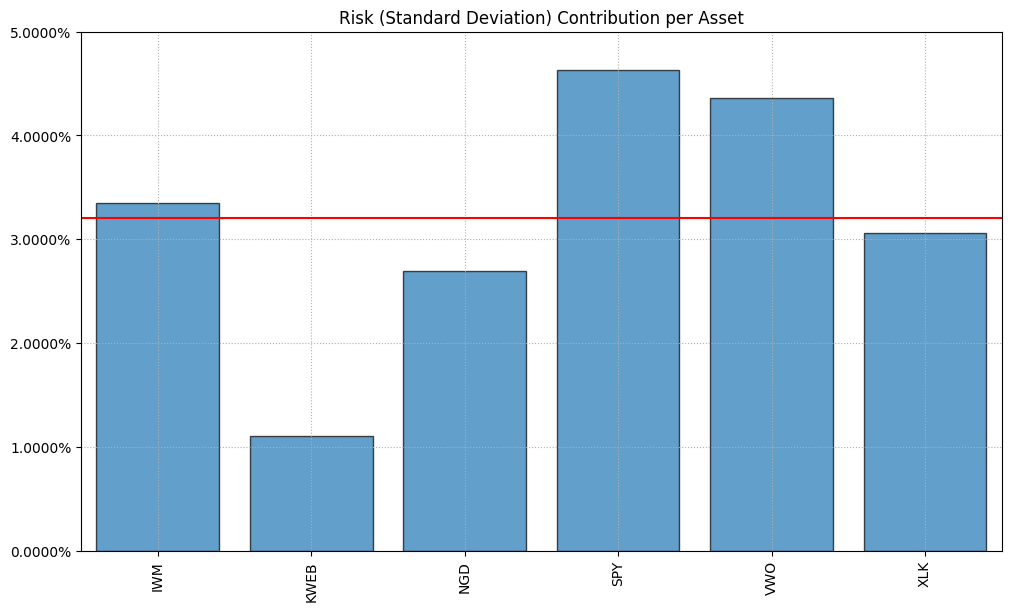

In [95]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       color="tab:blue",
                       height=6,
                       width=10,
                       t_factor=252,
                       ax=None)

In [96]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

-rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          #correlation=correlation,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          obj='Sharpe',  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
                          leaf_order=leaf_order)


    print(i)
    ax = rp.plot_drawdown(returns=Y,
                      w=w,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)
    plt.show()


    x = rp.plot_table(returns=Y,
                   w=w,
                   MAR=0,
                   alpha=0.05,
                   ax=None)
    plt.show()



    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-96-1c45bbd9043f>, line 26)

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [ ]:
# Transponer el DataFrame: columnas pasan a filas y viceversa
w_s_transposed = w_s.T  # Ahora los portafolios estarán en el eje X

# Crear figura
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

# Graficar
w_s_transposed.plot.bar(ax=ax)

# Leyenda mostrará los nombres de los activos (antes estaban en el eje X)
ax.legend(title="Activos")

plt.xlabel("Portafolios")
plt.ylabel("Peso")
plt.tight_layout()
plt.show()